In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from glob import glob
from scipy.optimize import curve_fit

In [2]:
def remove_offset(df, column_name):
    head = df.head(20)
    
    offset = np.mean(head[column_name])

    df[column_name] = df[column_name] - offset

    return df

   response time  response voltage  signal time  signal voltage  \
0      -0.000038               0.0    -0.000038             0.2   
1      -0.000038               0.0    -0.000038             0.2   
2      -0.000038               0.0    -0.000038             0.2   
3      -0.000038               0.0    -0.000038             0.2   
4      -0.000037               0.0    -0.000037             0.2   

   log response voltage  
0                  -inf  
1                  -inf  
2                  -inf  
3                  -inf  
4                  -inf  
2.4000021e-06


/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyError: 0

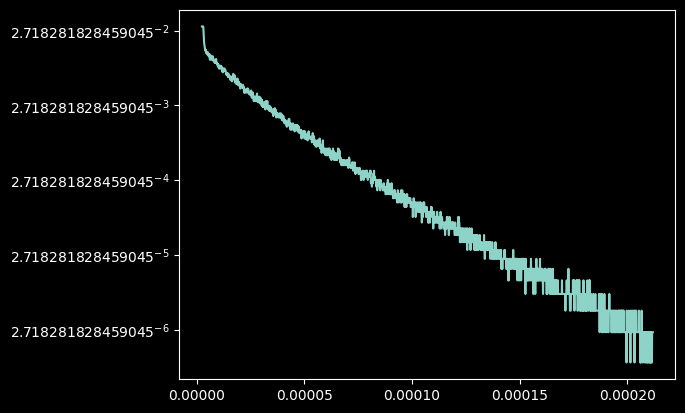

In [53]:
files = sorted(glob('../data/*/*.csv')) # get all data

def ticklabels(y, pos):
    return r'$e^{{{:.0f}}}$'.format(np.log(y))

def line(t, m, b):
    return m * t + b

def make_plot(df, fname):
    fig, ax = plt.subplots()

    df = df[df['signal time'] > 2.4e-6]
    
    plt.semilogy(
        df["response time"], 
        df["response voltage"],
        base=np.e
        )

    t_i = df.iat[0, 0]
    print(t_i)
    t_f = df.at[-1, 0]
    V_i = df.at[0, 'signal voltage']
    V_f = df.at[-1, 'signal voltage']
    print(V_i)

    m0 = (V_f - V_i) / (t_f - t_i)
    b0 = V_i
    print(m0)
    popt, pcov = curve_fit(line, df['response time'], df['response voltage'], p0=[m0, b0])
    
    slope = popt[0]
    intersect = popt[1]


    fit_points = pd.DataFrame({
        'x' : [t_i, t_f],
        'y' : [line(t_i, slope, intersect), line(t_f, slope, intersect)]
        })
    
    plt.plot(data=fit_points, x='x', y='y')
    
    plt.plot(
        df["signal time"], 
        df["signal voltage"]
        )
    
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticklabels))
    plt.xlabel(r'Time ($\mu{}s$)')
    plt.ylabel(r'Voltage (V)')
    plt.title(fname)
    
    plt.axvline(2.4e-6, color='red')

for file in files:
    df = pd.read_csv(
        file, 
        usecols=['signal time', 'signal voltage', 'response time', 'response voltage']
        )


    df = remove_offset(df, 'response voltage')
    df['log response voltage'] = np.log(df['response voltage'])
    print(df.head())

    make_plot(df, fname=file)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      response time  response voltage   signal time  signal voltage
0     -1.180000e-07           -0.0016 -1.180000e-07             0.2
1     -1.160000e-07           -0.0016 -1.160000e-07             0.2
2     -1.140000e-07           -0.0016 -1.140000e-07             0.2
3     -1.120000e-07           -0.0016 -1.120000e-07             0.2
4     -1.100000e-07           -0.0016 -1.100000e-07             0.2
...             ...               ...           ...             ...
2494   4.870000e-06           -0.0008  4.870000e-06             0.2
2495   4.872000e-06           -0.0008  4.872000e-06             0.2
2496   4.874000e-06           -0.0008  4.874000e-06             0.2
2497   4.876000e-06           -0.0008  4.876000e-06             0.2
2498   4.878000e-06           -0.0008  4.878000e-06             0.2

[2499 rows x 4 columns]


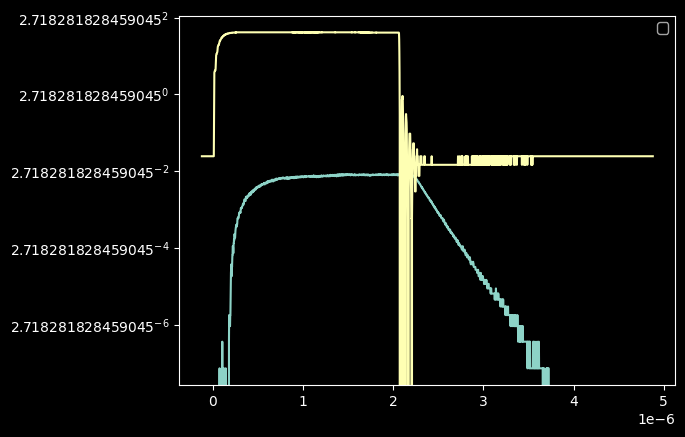

In [4]:
measuring_temp = {"-10C","0C","10C","20C","30C","40C","50C","60C","70C","80C","90C","100C"}

# for i in range(len(measuring_temp)):
df = pd.read_csv("/Users/rhillman/school/phys461/2-temperature_flourescence/data/90C/90.0C.csv", usecols=['signal time', 'signal voltage', 'response time', 'response voltage'])
    # test = os.listdir("/run/media/user1/Seagate/PHYS-461/2-temperature_flourescence/data/" + measuring_temp[2])
print(df)
# path_to_data = os.chdir()

# df.filter()

plt.plot(df["response time"], df["response voltage"])
plt.plot(df["signal time"], df["signal voltage"])
plt.yscale('log', base=np.e)
plt.legend()

In [5]:
df

,response time,response voltage,signal time,signal voltage
0,-1.180000e-07,-0.0016,-1.180000e-07,0.2
1,-1.160000e-07,-0.0016,-1.160000e-07,0.2
2,-1.140000e-07,-0.0016,-1.140000e-07,0.2
3,-1.120000e-07,-0.0016,-1.120000e-07,0.2
4,-1.100000e-07,-0.0016,-1.100000e-07,0.2
...,...,...,...,...
2494,4.870000e-06,-0.0008,4.870000e-06,0.2
2495,4.872000e-06,-0.0008,4.872000e-06,0.2
2496,4.874000e-06,-0.0008,4.874000e-06,0.2
2497,4.876000e-06,-0.0008,4.876000e-06,0.2


In [6]:
df = remove_offset(df, 'signal voltage')
np.log(df.iloc[[1000]]['signal voltage'])

1000    1.568616
Name: signal voltage, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


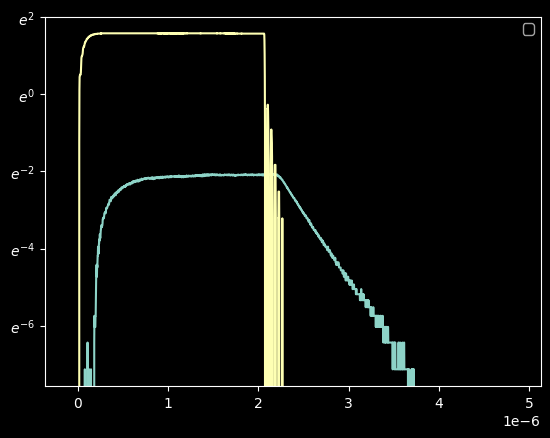

In [7]:
fig, ax = plt.subplots()

plt.semilogy(
    df["response time"], 
    df["response voltage"],
    base=np.e
    )

plt.semilogy(
    df["signal time"], 
    df["signal voltage"],
    base=np.e
    )

def ticklabels(y, pos):
    return r'$e^{{{:.0f}}}$'.format(np.log(y))


# plt.yscale('log', base=np.e)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticklabels))

plt.legend()

In [8]:
def derivative(df, column_name, ind, dep):
    new_column = [0]
    for i, val in enumerate(df[column_name]):
        new_column.append(val*0.6 + newColumn[i]*0.4)
    return newColumn[1:]

In [9]:
df[df['signal time'] > 2.1e-6].head(50)



,response time,response voltage,signal time,signal voltage
1110,0.000002,0.1240,0.000002,0.68
1111,0.000002,0.1248,0.000002,0.76
1112,0.000002,0.1248,0.000002,0.76
1113,0.000002,0.1256,0.000002,0.64
1114,0.000002,0.1240,0.000002,0.44
1115,0.000002,0.1232,0.000002,0.36
1116,0.000002,0.1232,0.000002,0.16
1117,0.000002,0.1232,0.000002,-0.20
1118,0.000002,0.1232,0.000002,-0.44
1119,0.000002,0.1248,0.000002,-0.52


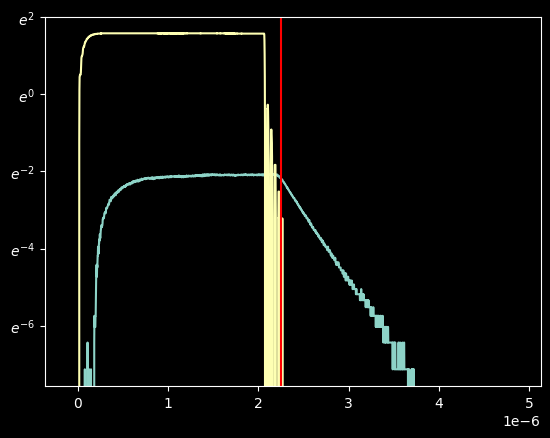

In [10]:
fig, ax = plt.subplots()

# df = df[df['signal time'] > 2.25e-6]

plt.semilogy(
    df["response time"], 
    df["response voltage"],
    base=np.e
    )

plt.semilogy(
    df["signal time"], 
    df["signal voltage"],
    base=np.e
    )

ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticklabels))

plt.axvline(2.25e-6, color='red')